In [20]:
import tweepy
import pandas as pd
consumer_key = "YOURS"
consumer_secret = "YOURS"

access_token = "YOURS"

access_token_secret = "YOURS"

authorization = tweepy.OAuthHandler(consumer_key, consumer_secret)

authorization.set_access_token(access_token, access_token_secret)

api = tweepy.API(authorization,wait_on_rate_limit=True)

In [75]:
text=[]
likes=[]
time=[]




In [107]:
for i in tweepy.Cursor(api.search, q='vaccine covid-vaccine doctors vaccination -filter:retweets',lang="en", tweet_mode="extended").items(200):
    text.append( i.full_text)
    likes.append(i.favorite_count) 
    time.append(i.created_at)

        


In [122]:
df=pd.DataFrame({'text': text, 'likes':likes})
df

,text,likes
0,"https://t.co/RSwXP8xK3p \n""UK Medical Freedom ...",0
1,Covid-19 vaccine supplies exceed usage. @MoHFW...,24
2,"Woman gets COVID-19 vaccine, then virus. Docto...",2
3,From that interview - “why do we need to prior...,0
4,Important interview from Te Ao with Moana @mao...,9
...,...,...
1018,Physicians are feeling left out of the Covid-1...,0
1019,When it comes to the Covid vaccine and ethnic ...,0
1020,Group of Malaysian Doctors &amp; Officials Sug...,15
1021,Peru starts Covid-19 vaccination roll out with...,0


In [124]:
anti=0
antilikes=0
promote=0
promotelikes=0
totallikes=0
for t, l in zip(text,likes):
    if(t.find("anti")!=-1 or t.find("Anti")!=-1 or t.find("afraid")!=-1 or t.find("Afraid")!=-1 or t.find("Alien")!=-1 or t.find("alien race")!=-1  ):
        anti+=1
        antilikes+=l
        totallikes+=l
        print(t)
        print()
    else:
        promote+=1
        promotelikes+=l
        totallikes+=l



@SenRickScott Why don’t u try to rationalize with Desantis that Drs are saying people with compromised immune systems should be top priority to get the Covid 19 vaccination to. U are not doctors quit play with our lives and make the vaccine available to Compromised individuals!

A Tennessee doctor has died of multisystem inflammatory syndrome or MIS, a COVID-related illness. He tested positive for COVID antibodies and had been recently vaccinated, but his doctors are speaking out that the vaccine did not contribute to his death. https://t.co/E36q4KIyJy

Being afraid of Covid-19 increases people’s likelihood of getting vaccinated by up to 40 percent. Similarly, if a person trusts their doctor, they are up to 20 percent more likely to get the vaccine. 

https://t.co/eF5NPG4Imk

A growing anti-vax faction is pushing baseless new claims against doctors and nurses who give the COVID vaccine. The group that shut down an LA vaccination site last month is planning a sequel, with that conspirac

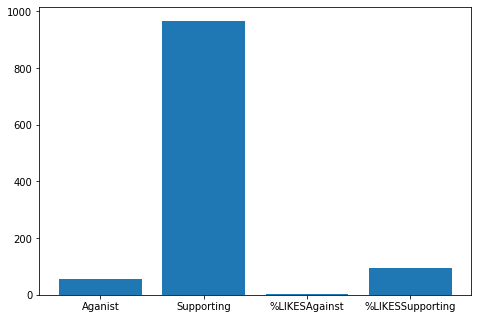

In [121]:
import matplotlib.pyplot as plt
percentanti=antilikes/totallikes * 100
percentpromote=promotelikes/totallikes * 100
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Aganist','Supporting', '%LIKESAgainst', '%LIKESSupporting' ]
students = [anti,promote, percentanti, percentpromote]
ax.bar(langs,students)
plt.show()

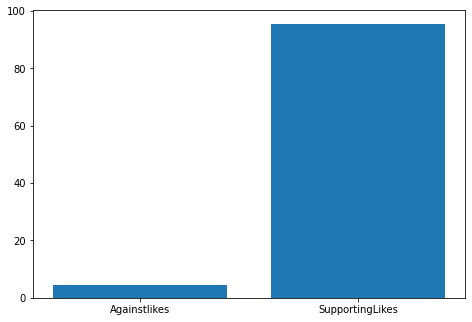

In [120]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['Againstlikes','SupportingLikes']
students = [percentanti,percentpromote]
ax.bar(langs,students)
plt.show()